<a href="https://colab.research.google.com/github/kiakass/machine-learning/blob/main/AML_Assignment_2_%EA%B3%BD%EC%A4%80%ED%99%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Reference site:

Gaussian Process Kernel <br>
http://krasserm.github.io/2018/03/19/gaussian-processes/

Repository: <br>
https://github.com/krasserm/bayesian-machine-learning


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp, scipy.stats
import pandas as pd

### ■ Exponential of a quardratic form kernel function

> $ k(\text{x}_n, \text{x}_m ) = \theta_0 exp\Bigl\{ - \frac{\theta_1}{2} \| 	\text{x}_n - \text{x}_m \|^2  \Bigr\} + \theta_2 + \theta_3 \text{x}^T\text{x}_m $

In [ ]:
def kernel(X1, X2, theta_0, theta_1, theta_2, theta_3):
    """
    Isotropic squared exponential kernel.
    
    Args:
        X1: Array of m points (m x d).
        X2: Array of n points (n x d).

    Returns:
        (m x n) matrix.
    """
    rbf = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    linear = np.dot(X1, X2.T)
    return theta_0**2 * np.exp(-0.5 * theta_1 * rbf) + theta_2 + theta_3 * linear

In [ ]:
def plot_gp(mu, cov, X, N, M, k, X_train=None, Y_train=None, samples=[]):
    """
    plot gaussian process

    """
    X = X.ravel()
    mu = mu.ravel()
    uncertainty = 1.96 * np.sqrt(np.diag(cov))
    ax = fig.add_subplot(N, M, k+1)

    ax.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
    ax.plot(X, mu, label='Mean')
    for i, sample in enumerate(samples):
        ax.plot(X, sample, lw=1, ls='-', label=f'Sample {i+1}')
    if X_train is not None:
        plt.plot(X_train, Y_train, 'rx')
    plt.legend(loc=1)

### ■ Samples from a GP prior for different setting of parameter $( \theta_0 ,\theta_1, \theta_2, \theta_3 )$





> $N \sim GP(\mu, \mathit{\Sigma}) $ 이고 , $ \mathit{\Sigma} = k(\text{x}_n, \text{x}_m ) $ 이므로 parameter $\theta_n$ 값에 의해 GP가 변화함

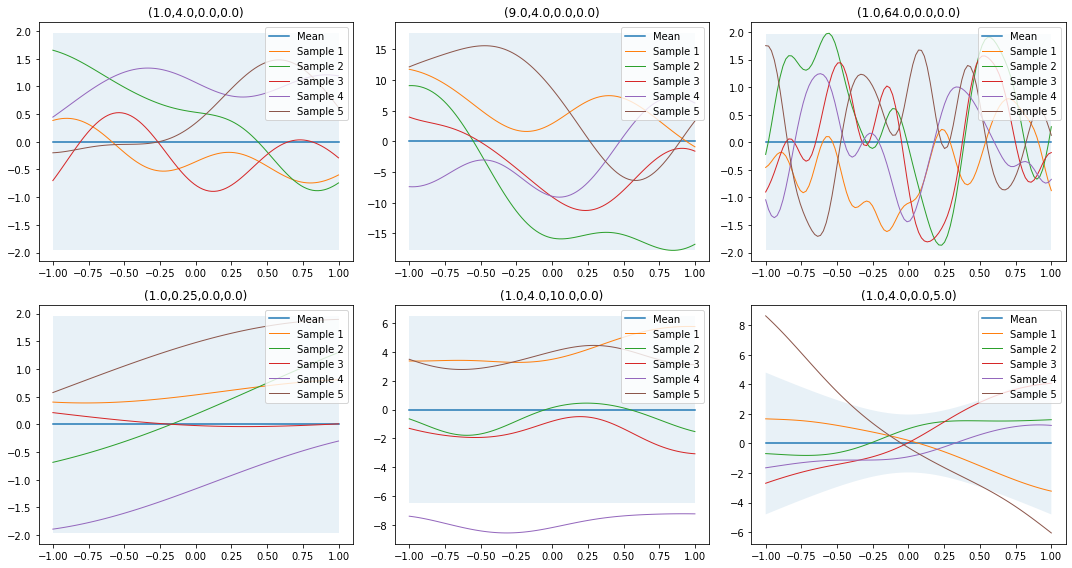

In [ ]:
# init value
mean = 0
num = 25
alpha,beta =[2.,25]

# Finite number of points
X = np.linspace(-1,1,100).reshape(-1,1)

# Parameter Θ values
theta = np.array([[1.00,4.00,0.00,0.00],
                  [9.00,4.00,0.00,0.00],
                  [1.00,64.00,0.00,0.00],
                  [1.00,0.25,0.00,0.00],
                  [1.00,4.00,10.00,0.00],
                  [1.00,4.00,0.00,5.00]])

N = 2
M = 3
fig = plt.figure(figsize=(15, 8))

for i in range(N):
  for j in range(M):
      k = i * M + j
      # Mean and covariance of the prior
      mu = np.zeros(X.shape)
      cov = kernel(X, X, theta[k][0], theta[k][1] , theta[k][2], theta[k][3] )
      # Draw five GP samples from the prior
      samples = np.random.multivariate_normal(mu.ravel(), cov, 5)
      # Plot GP mean, uncertainty region and samples 
      plot_gp(mu, cov, X, N,M,k, samples=samples)
      plt.title('('+str(theta[k][0])+','+str(theta[k][1])+','+str(theta[k][2])+','+str(theta[k][3])+')')

plt.tight_layout() #자동 layout

### ■ Explain GP graph for different parameter

> $\theta$ 의 의미 <br>
> $\theta_0 : scale $ <br>
> $\theta_1 : smoothness $, 분산의 역수 <br>
> $\theta_2 : 변동폭 $ <br>
> $\theta_3 : 선형관계 $ <br>

> 첫번째 그래프([1.00,4.00,0.00,0.00]) 는 N(0,cov) 인 5개의 sample GP를 나타냄<br><br>
> 두번째 그래프([$\color{Red}{9.00}$,4.00,0.00,0.00]) 와 같이 $\theta_0 $ 가 커지면, y축의 scale 이 증가함 <br><br>
> 세번째 그래프([1.00,$\color{Red}{64.00}$,0.00,0.00]) 와 같이 $\theta_1 $ 가 커지면, 분산이 작아지므로 그래프의 진폭이 좁아짐 <br><br>
> 네번째 그래프([1.00,$\color{Red}{0.25}$,0.00,0.00]) 와 같이 $\theta_1 $ 가 작아지면, 분산이 커지므로 그래프의 진폭이 넓어짐 <br><br>
> 다섯번째 그래프 [1.00,4.00,$\color{Red}{10.00}$,0.00] 와 같이 $\theta_2 $ 가 커지면, 변동폭이 커짐 <br><br>
> 여섯번째 그래프 [1.00,4.00,0.00,$\color{Red}{5.00}$] 와 같이 $\theta_3 $ 가 커지면, 선형성이 높아져 직선형태의 그래프가 나타남 <br><br>